# Exploración y Recolección de Datos con Joins en Fórmula 1

Este notebook está diseñado para una clase práctica en la que se exploran y recolectan datos mediante la unión (_joins_) de múltiples datasets de Fórmula 1. El objetivo es analizar conjuntamente información procedente de diferentes orígenes para responder preguntas de negocio y obtener insights sobre la historia de la F1.

## Objetivos de la Clase

1. Comprender el uso de joins para combinar tablas utilizando claves comunes (por ejemplo, `raceId` y `driverId`).
2. Explorar la integración de datos provenientes de archivos distintos y su impacto en la información resultante.
3. Responder a preguntas de negocio como:
   - ¿Cuántos pilotos han participado en la F1?
   - ¿Cuál es el circuito que ha sido más utilizado?
   - ¿Qué piloto ha ganado más carreras?
   - ¿Qué piloto ha acumulado más puntos durante su carrera?
4. Interpretar gráficamente resultados y tendencias a lo largo del tiempo.

La idea es que, mediante el uso de operaciones join, los estudiantes unan y analicen datos de varias fuentes (por ejemplo, `races.csv`, `results.csv` y `drivers.csv`) para elaborar un análisis exploratorio completo.

In [28]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
!unzip f1stasts_1.zip

--2025-05-02 15:03:54--  https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip [following]
--2025-05-02 15:03:54--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6183969 (5.9M) [application/zip]
Saving to: ‘f1stasts_1.zip.1’

f1stasts_1.zip.1    100%[===================>]   5.90M  --.-KB/s    in 0.09s   

2025-05-02 15:03:55 (68.3 MB/s) - ‘f1stasts_1.zip.1’ saved [6183969/618396

In [29]:
import pandas as pd

# Load the datasets
races_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
drivers_df = pd.read_csv('drivers.csv')

# Create df_resultados by merging results_df and drivers_df
df_resultados = pd.merge(results_df, drivers_df, on='driverId', how='inner') # This line was missing and is added now

# Merge df_resultados with races_df to create df_completo
df_completo = pd.merge(df_resultados, races_df, on='raceId', how='inner')

# Now you can use df_completo
unique_constructor_ids = df_completo['constructorId'].unique()

# Print the unique constructor IDs
print(unique_constructor_ids)


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  21  20  22  24  25  26  27  29  28  30  31  32  33  34  35  36  37
  38  40  39  41  42  44  45  46  47  23  48  49  50  51  52  53  54  55
  56  57  58  59 204  60  61  62 182  63  64  65  66  67  68  69  70  71
  72  73  74 202  75  76 203  80  77  78  79  81  82  83  84 180 200 199
 201  85 187  86 198 196 191 167 197 189 183 194 190  89 170 195 184 176
 172 193  90 181 188 192  91 185 186  93  94  92  95  96  97 177 179 173
  98  99 175  87 100 174 178 101 102 103 104 105 106 171 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 169 123 168 124 125 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 152 151 126 153 154 155 156 157 158 159 160 162 161
 163 205 164 166 208 206 207 209 210 211 213 214]


## 1. Carga y Exploración de los Datos

En esta sección se cargan y revisan brevemente los datasets principales:

- **races.csv:** Contiene detalles de cada carrera (año, circuito, fecha, etc.).
- **results.csv:** Registra los resultados de cada carrera (posición, puntos, vueltas, etc.).
- **drivers.csv:** Información sobre cada piloto (nombre, nacionalidad, fecha de nacimiento, etc.).

Asegúrate de tener estos archivos en tu entorno de trabajo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [7]:
import pandas as pd

# Load the datasets
races_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
drivers_df = pd.read_csv('drivers.csv')

# Briefly review the datasets
races_df.head()  # Display the first few rows of races_df
results_df.info()  # Display information about results_df
drivers_df.describe()  # Display descriptive statistics of drivers_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

,driverId
count,857.000000
mean,429.057176
std,247.632402
min,1.000000
25%,215.000000
50%,429.000000
75%,643.000000
max,858.000000


## 2. Análisis Preliminar y Preparación de los Datos

Antes de realizar las uniones, es importante revisar las columnas clave de cada DataFrame:

- En **races_df** utilizaremos `raceId` para identificar la carrera.
- En **results_df** también se emplea `raceId` y `driverId` para enlazar resultados y pilotos.
- En **drivers_df** `driverId` es la clave para identificar a cada piloto.

Realiza un análisis exploratorio básico (conteos, tipos de dato, detección de nulos) para asegurarte de la calidad de la información.

In [10]:
race_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
drivers_df = pd.read_csv('drivers.csv')

In [11]:
race_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [5]:
for col in race_df.columns:
  race_df.loc[race_df[col]=='\\N',col]= np.nan


In [6]:
race_df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/di

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1.0,2009.0,1.0,1.0,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2009.0,2.0,2.0,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2009.0,3.0,17.0,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2009.0,4.0,3.0,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2009.0,5.0,4.0,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116.0,2023.0,18.0,69.0,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,NaN,NaN,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117.0,2023.0,19.0,32.0,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,NaN,NaN
1098,1118.0,2023.0,20.0,18.0,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,NaN,NaN,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119.0,2023.0,21.0,80.0,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,NaN,NaN


## 3. Integración de Datos mediante Joins

El objetivo es unir la información de las distintas tablas para poder responder a preguntas de negocio. En este ejercicio central, se utilizarán joins para obtener insights combinando datos de carreras, resultados y pilotos.

### 3.1 Unir `results_df` y `drivers_df`

Para analizar la participación y resultados de cada piloto, realizamos un merge entre `results_df` y `drivers_df` utilizando la clave `driverId`.

**Pregunta clave:** ¿Cuántos pilotos distintos han participado en la F1?

Utiliza el DataFrame resultante para explorar esta pregunta.

In [12]:
df_resultados = pd.merge(results_df, drivers_df, on='driverId', how='inner')


In [13]:
num_drivers = df_resultados['driverId'].nunique()
print(f"Number of distinct drivers in F1: {num_drivers}")


Number of distinct drivers in F1: 857


### 3.2. Unir `df_resultados` con `races_df`

Ahora, para relacionar los resultados con cada carrera, se efectúa la unión entre el DataFrame obtenido (`df_resultados`) y `races_df` a través de la clave `raceId`.

**Pregunta clave:** ¿Qué información adicional sobre cada carrera (fecha, circuito, etc.) se puede incorporar para enriquecer el análisis?

Explora y analiza cómo afecta esta integración en el conjunto de datos final.

In [14]:
df_completo = pd.merge(df_resultados, races_df, on='raceId', how='inner')


## 4. Análisis Conjunto y Ejercicios Interactivos

Con el DataFrame combinado (`df_completo`) podremos responder a varias preguntas de negocio y realizar análisis conjuntos. A continuación se proponen algunos ejercicios:

### Ejercicio 1: Identificar el Circuito Más Utilizado

Utiliza `races_df` y la información del DataFrame combinado para determinar cuál es el circuito (identificado con `circuitId` o el nombre del circuito, si se encuentra) que ha sido sede de la mayor cantidad de carreras.

**Sugerencia:** Usa la función `value_counts()` y discute el resultado con los estudiantes.

In [15]:
# Assuming 'circuitId' is the column representing the circuit in races_df
most_used_circuit = races_df['circuitId'].value_counts().idxmax()

# Print the result
print(f"The most used circuit is: {most_used_circuit}")

# If you want to find the circuit name instead of circuitId:
# (Assuming 'name' column in races_df contains circuit names)
circuit_name = races_df.loc[races_df['circuitId'] == most_used_circuit, 'name'].iloc[0]
print(f"The most used circuit name is: {circuit_name}")

The most used circuit is: 14
The most used circuit name is: Italian Grand Prix


### Ejercicio 2: Piloto con Más Victorias

Filtra el DataFrame combinado para quedarte con aquellos registros donde la posición final (`position`) sea 1, lo que indica una victoria. Luego, agrupa por piloto para determinar quién ha ganado más carreras.

**Pregunta para los estudiantes:** _¿Qué piloto se destaca por su número de victorias y cómo se relaciona este dato con otros indicadores de rendimiento?_

In [16]:
# Filtrar victorias (posición 1)

wins_df = df_completo[df_completo['positionOrder'] == 1]

# Group by driver and count wins
driver_wins = wins_df.groupby('driverId')['raceId'].count().reset_index()

# Rename columns for clarity
driver_wins.rename(columns={'raceId': 'win_count'}, inplace=True)

# Sort by win count in descending order
driver_wins = driver_wins.sort_values(by=['win_count'], ascending=False)

# Display the driver with the most wins
most_wins_driver = driver_wins.iloc[0]['driverId']
print(f"The driver with the most wins is: {most_wins_driver}")



The driver with the most wins is: 1


### Ejercicio 3: Piloto con Más Puntos

Agrupa el DataFrame combinado para sumar el total de puntos (`points`) obtenidos por cada piloto a lo largo de su carrera.

**Pregunta para los estudiantes:** _¿Existe correlación entre el número de victorias y la suma total de puntos? ¿Qué puede influir en esta relación?_

In [18]:
# Group by driverId and sum points
driver_points = df_completo.groupby('driverId')['points'].sum().reset_index()

# Rename the 'points' column to 'total_points' for clarity
driver_points.rename(columns={'points': 'total_points'}, inplace=True)

# Sort by total_points in descending order to see the top performers
driver_points = driver_points.sort_values(by=['total_points'], ascending=False)

# Display the DataFrame to see the results
driver_points.head()

,driverId,total_points
0,1,4540.5
19,20,3098.0
828,830,2275.5
3,4,2203.0
7,8,1873.0


In [19]:
# Merge driver_wins and driver_points DataFrames
driver_stats = pd.merge(driver_wins, driver_points, on='driverId', how='inner')

# Calculate the correlation between win_count and total_points
correlation = driver_stats['win_count'].corr(driver_stats['total_points'])

print(f"Correlation between win count and total points: {correlation}")

Correlation between win count and total points: 0.7667635549112088


### Ejercicio 4: Distribución de Nacionalidades de los Pilotos

Analiza la columna `nationality` presente en `drivers_df` para determinar qué nacionalidades están mejor representadas en la F1. Realiza un gráfico de pastel para visualizar la distribución de pilotos por país.

**Debate:** ¿Qué factores históricos o deportivos crees que puedan explicar esta distribución?

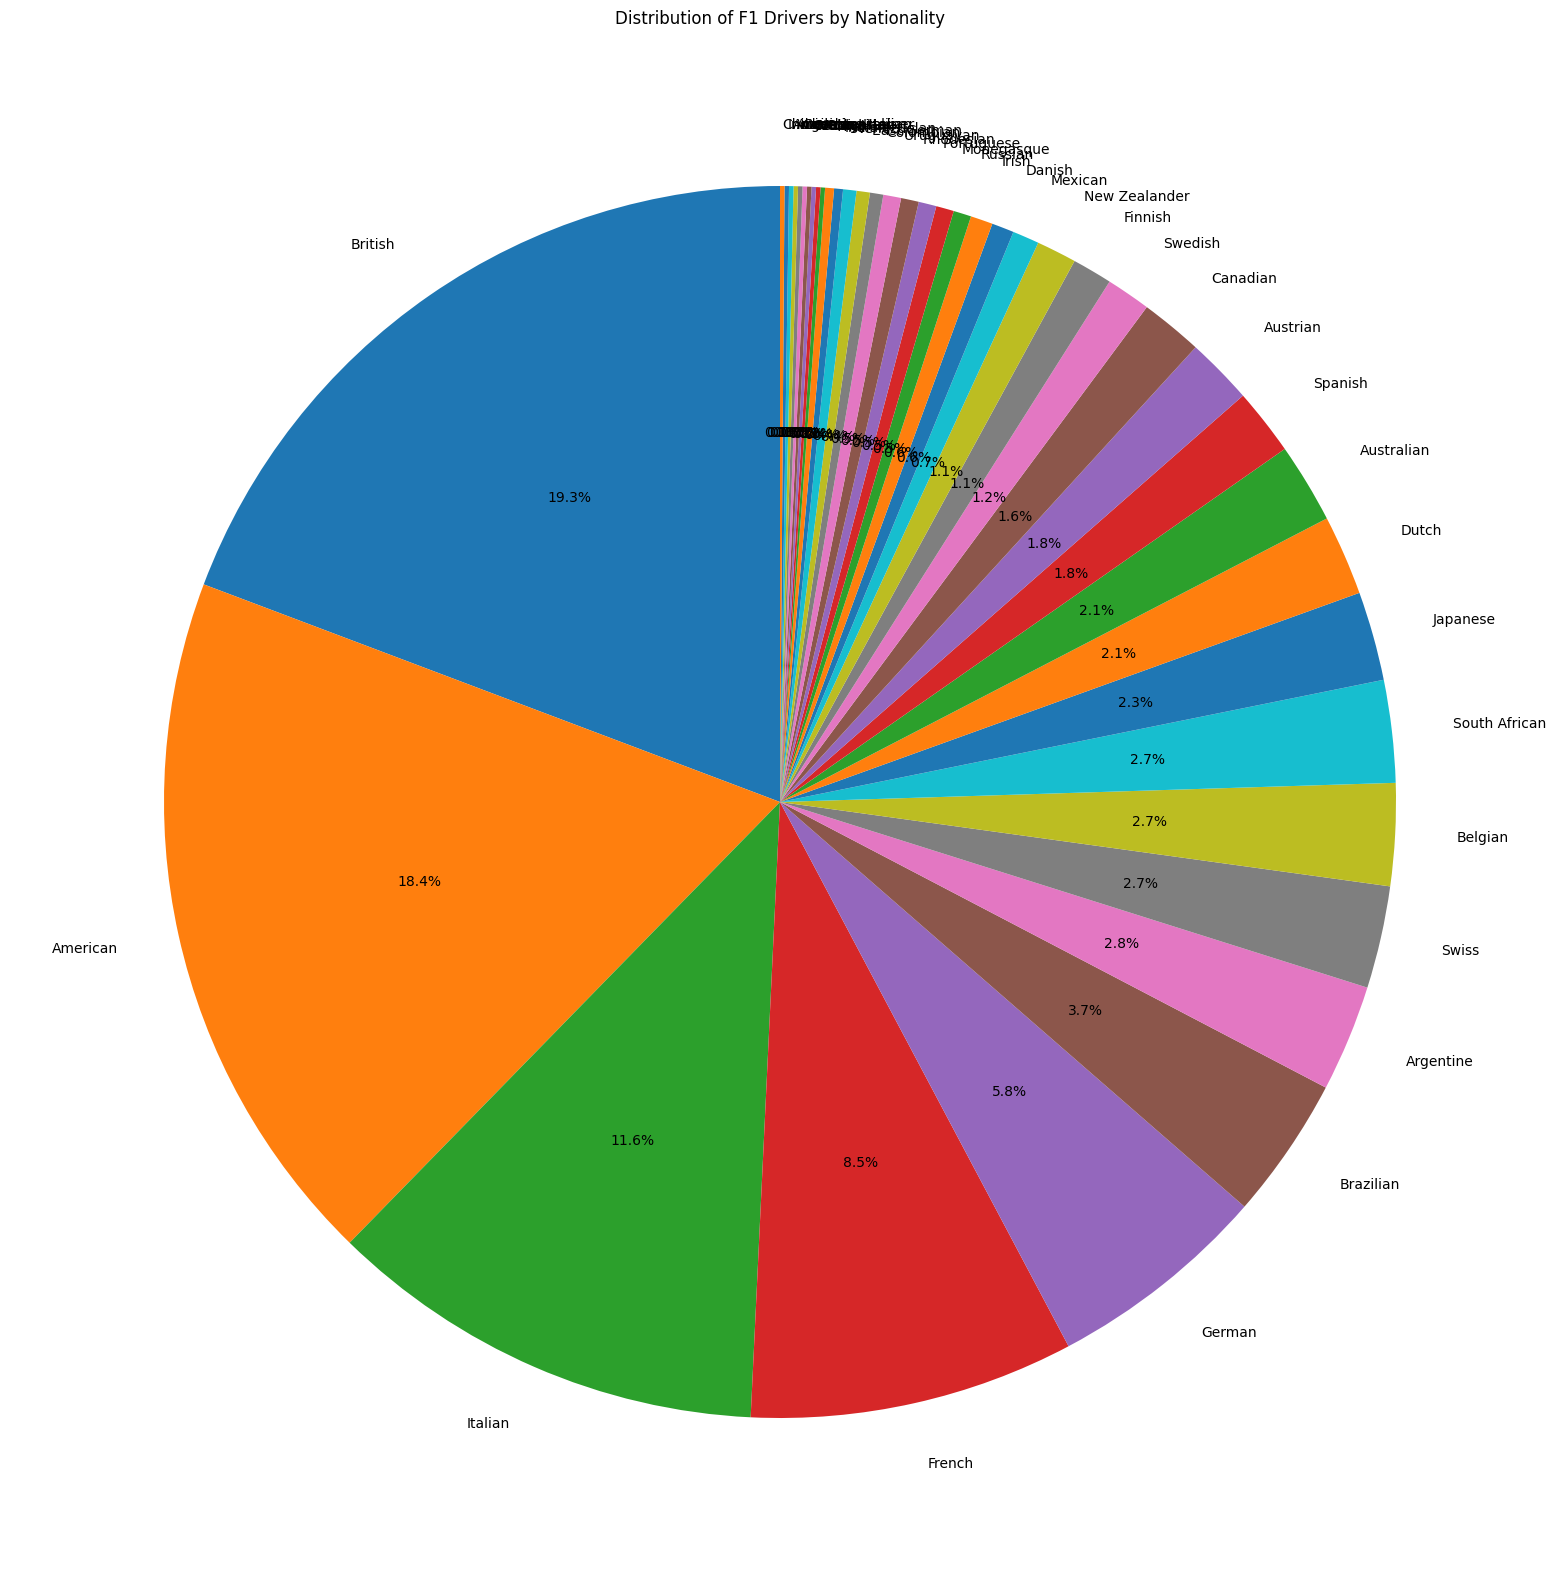

In [22]:
import matplotlib.pyplot as plt

# Count the occurrences of each nationality
nationality_counts = drivers_df['nationality'].value_counts()

# Create a pie chart
plt.figure(figsize=(20, 20))  # Adjust figure size if needed
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of F1 Drivers by Nationality')
plt.show()


### Ejercicio 5: Evolución del Número de Carreras por Año

Genera un gráfico de barras que muestre cómo ha evolucionado el número de carreras a lo largo de los años, utilizando la información de `races_df`.

**Pregunta para los estudiantes:** _¿Qué eventos o cambios en la industria (por ejemplo, crisis, cambios en el reglamento) podrían explicar las variaciones observadas a lo largo de la historia?_

Este ejercicio ayudará a vincular el análisis de datos con contextos históricos y comerciales.

<function matplotlib.pyplot.show(close=None, block=None)>

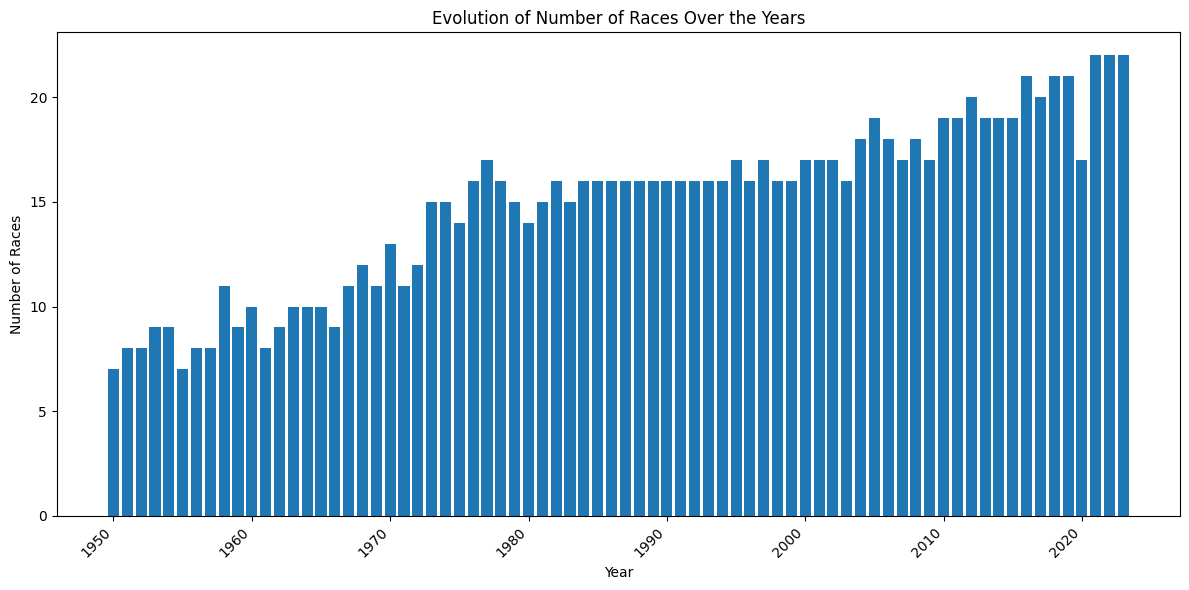

In [27]:

import matplotlib.pyplot as plt

# Group by year and count races
races_per_year = races_df.groupby('year')['raceId'].count().reset_index()

# Rename columns for clarity
races_per_year.rename(columns={'raceId': 'race_count'}, inplace=True)

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(races_per_year['year'], races_per_year['race_count'])
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.title('Evolution of Number of Races Over the Years')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show


## 5. Preguntas para el Análisis Conjunto y Debate en Clase

Para concluir la actividad, propón a los estudiantes debatir y responder a las siguientes preguntas:

1. **Integración y Calidad de Datos:** ¿Qué inconvenientes pueden surgir al unir tablas que tienen registros incompletos o duplicados? ¿Cómo solucionarlo?
2. **Estrategias de Join:** ¿En qué casos es más adecuado usar un `inner join` y cuándo un `outer join` para evitar perder información relevante?
3. **Insights Negocio:** Basándose en los resultados obtenidos (pilotos con más victorias/puntos, circuitos más usados, etc.), ¿qué estrategias de negocio o insights se podrían extraer para equipos o patrocinadores en la F1?
4. **Análisis Temporal:** ¿Qué relación existe entre los cambios en el número de carreras por año y otros indicadores (como el número de pilotos, eventos destacados, etc.)?

Estas preguntas tienen el objetivo de invitar a un análisis integral de los datos, combinando la técnica de joins con la interpretación y contextualización de los resultados.

1.Algunos problemas que pueden pasar al unir tablas con datos incompletos o duplicados es que se puede perder info importante, quedarse con datos repetidos o directamente que la tabla final tenga errores. Para evitar eso, lo mejor es primero filtrar bien los datos antes de unir, usar el tipo de join que sea más conveniente, validar que los datos estén bien o incluso transformarlos si hace falta.

2.El inner join sirve más que nada para quedarse solo con los datos que están en común entre dos tablas, es como una forma de filtrar. En cambio, el outer join te ayuda a juntar todo, aunque haya cosas que no coincidan, es más como para unir toda la info disponible.

3.Para los equipos, algunas estrategias que podrían usar son: fijarse en los pilotos con más potencial viendo su historial de victorias, puntos y otros datos; también analizar cómo rinde el coche en cada circuito para ver qué pueden mejorar y optimizar el diseño; y usar los datos históricos de las carreras para encontrar patrones que les ayuden a tomar mejores decisiones durante las competencias.

Para los patrocinadores:

A la hora de elegir equipos, pueden usar los datos de rendimiento para apostar por los que tienen más chances de ganar y así asegurar una mejor inversión.

También pueden fijarse en los pilotos, buscando a los más populares o con mejor rendimiento para que su marca tenga más visibilidad.

Y con los datos de audiencia, pueden identificar mejor a su público objetivo y planear estrategias de patrocinio que conecten más con la gente.

4.La relación entre el número de carreras al año y otros factores es interesante. Por ejemplo:

Si aumentan las carreras, probablemente también aumente la demanda de pilotos, porque hace falta más gente para competir y eso puede motivar a más personas a entrar al deporte.

Si las carreras bajan, puede que haya menos oportunidades para los pilotos y se reduzca el número de los que están activos.

Más carreras también pueden ayudar a que la F1 sea más popular, porque hay más chances de que la gente la siga y se enganche.

En términos de dinero, más carreras significa más ingresos por entradas, televisión y patrocinios, pero también suben los costos: hay más viajes, logística y desgaste de los coches.

Y no hay que olvidar la seguridad: al haber más carreras, los pilotos y equipos tienen menos tiempo para descansar y recuperarse, lo que puede hacer todo más riesgoso.

## 6. Conclusión

Este ejercicio integrador ha permitido utilizar joins para combinar distintos orígenes de datos y explorar de manera conjunta información esencial de la Fórmula 1. Se ha trabajado en:

- La identificación de claves y la integración de múltiples datasets.
- La generación de indicadores y visualizaciones útiles para responder preguntas de negocio.
- El análisis crítico y debate sobre la calidad de los datos y la metodología de integración.

Utiliza este notebook como una herramienta para profundizar en la recolección y exploración de datos, incentivando a los estudiantes a buscar conexiones entre la teoría de joins y su aplicación en casos reales.